In [1]:
from utils import *
from sklearn.naive_bayes  import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords


import numpy as np
import nltk

In [3]:
# Recuperação dos textos - treinar o modelo somente com as classes POS e NEG
all_data = get_data_from_db()
all_data = all_data[(all_data["labels"] == "PO") | (all_data["labels"] == "NG")]
print('Textos carregados')

# lexicon = get_LIWC_lexicon()
lexicon = load_claudia_freitas_lexicon()

print("Lexico carregado")

Textos carregados
Lexico carregado


In [4]:
#Stemming

stemmer = Stemmer()
all_texts = stemmer.fit_transform(all_data["texts"])
all_data["texts"] = all_texts

In [55]:
all_data.head()

,labels,texts
5,NG,o presidente do pt rui falcão acusou na noit...
6,NG,aécio faz coro a denúncias sem provas veicula...
7,NG,segundo falcão é cômico ouvir alguém do ps...
8,NG,ele citou o mensalão mineiro o esquema de cor...
9,NG,para o presidente do pt aécio deveria se preo...


# Analise de Textos Negativos



In [4]:
neg_texts = all_data[all_data["labels"] == "NG"]
cv = CountVectorizer(stop_words=stopwords.words("portuguese"), vocabulary= lexicon)

bag_of_words = cv.fit_transform(all_data["texts"])

svd = TruncatedSVD(n_components=3)
X_neg = svd.fit_transform(bag_of_words)



<IPython.core.display.Javascript object>


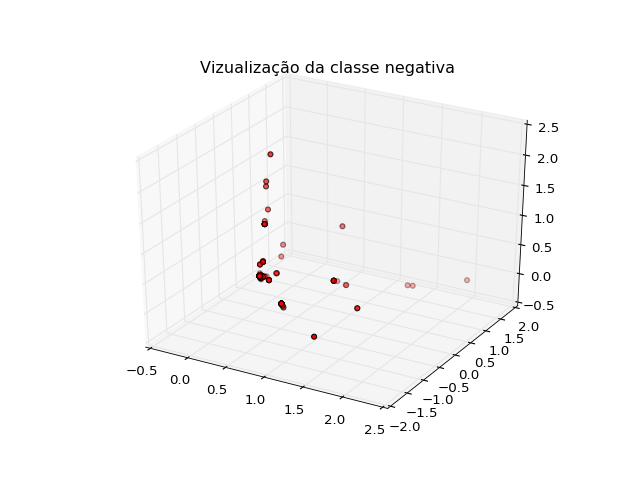

In [5]:
%matplotlib notebook

# from matplotlib import pyplot as plt
# plt.plo(X_neg[:,0], X_neg[:,1])

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_neg[:,0], X_neg[:,1], X_neg[:,2], c='r')
ax.set_title("Vizualização da classe negativa")

# Analise dos textos positivos

In [7]:
pos_texts = all_data[all_data["labels"] == "PO"]
cv = TfidfVectorizer(stop_words=stopwords.words("portuguese"), vocabulary= lexicon)

bag_of_words = cv.fit_transform(pos_texts["texts"])

svd = TruncatedSVD(n_components=3)
X_pos = svd.fit_transform(bag_of_words)


<IPython.core.display.Javascript object>


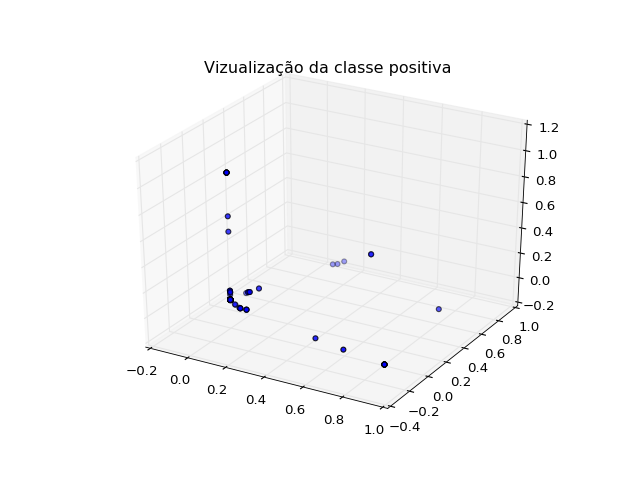

In [8]:
%matplotlib notebook

# from matplotlib import pyplot as plt
# plt.plot(X_pos[:,0], X_pos[:,1], 'ro')

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pos[:,0], X_pos[:,1], X_pos[:,2], c = 'b')
ax.set_title("Vizualização da classe positiva")

# Vizualização dos dois grupos

<IPython.core.display.Javascript object>


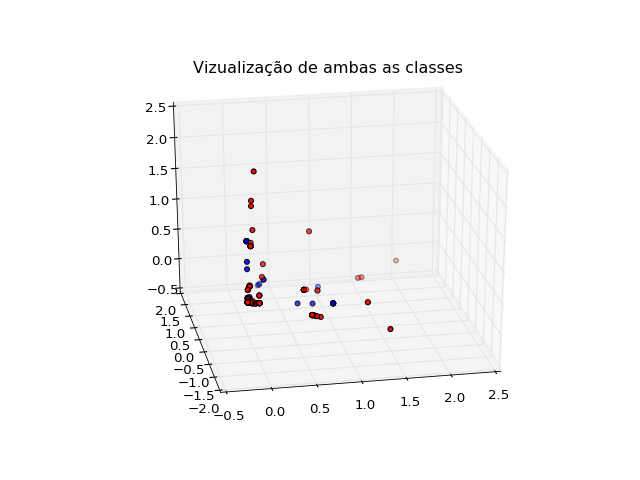

In [10]:
%matplotlib notebook
# from matplotlib import pyplot as plt
# plt.plot(X_neg[:,0], X_neg[:,1], 'ro', X_pos[:,0], X_pos[:,1], 'bo')

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pos[:,0], X_pos[:,1], X_pos[:,2], c = 'b')
ax.scatter(X_neg[:,0], X_neg[:,1], X_neg[:,2], c = 'r')
ax.set_title("Vizualização de ambas as classes")

In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from pandas import DataFrame
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

svm = SVC(C=316)
skfold = StratifiedKFold(n_splits=10, shuffle=True)

X_pos_data = np.append(X_pos, np.ones((X_pos.shape[0],1)), axis = 1)
X_neg_data = np.append(X_neg, -np.ones((X_neg.shape[0],1)), axis = 1)

data = np.append(X_pos_data, X_neg_data, axis=0)


for index, (train, test) in enumerate(skfold.split(data[:,0:3], data[:,3])):
    x_train = data[train,0:3]
    y_train =  data[train,3]
    
    x_test = data[test,0:3]
    y_test =  data[test,3]
    
    svm.fit(x_train, y_train)
    predictions = svm.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    
    print("Fold " + str(index) + " : " + str(accuracy) )

Fold 0 : 0.633802816901
Fold 1 : 0.7
Fold 2 : 0.628571428571
Fold 3 : 0.6
Fold 4 : 0.642857142857
Fold 5 : 0.614285714286
Fold 6 : 0.657142857143
Fold 7 : 0.614285714286
Fold 8 : 0.571428571429
Fold 9 : 0.642857142857
